In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data = pd.read_csv("merged_train.csv")
test_data = pd.read_csv("merged_test.csv")

In [3]:
photos = np.unique(np.concatenate([
    np.unique(train_data["Photo_filename"]),
np.unique(test_data["Photo_filename"])]))

In [4]:
#test_data["Photo_filename"].isnull().mean() # все с машинами

In [5]:
len(photos)

274

In [6]:
photos[0]

'photos/Audi/Audi-A3 Sedan-T9T9-K_MSIBN7U_NI.png'

In [113]:
#
import skimage
from skimage.io import imread, imshow
from skimage import data, io, filters, transform, feature

In [21]:
#for i in range(len(photos)):
image = imread(photos[0], as_grey=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


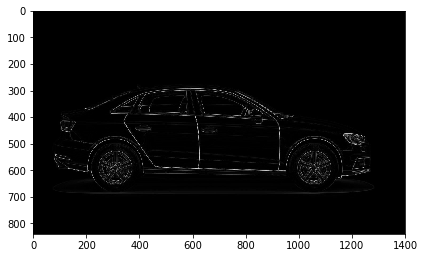

In [33]:
imshow(filters.roberts(image))

In [166]:
def crop_image(borders, image=None, cutoff=0.0001):
    if image is None:
        image=borders
    if cutoff is None:
        cutoff = borders.mean()
    x = np.where(borders.std(0) > cutoff)[0]
    y = np.where(borders.std(1) > cutoff)[0]
    return image[:, min(x):max(x)+1][min(y):max(y)+1]

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


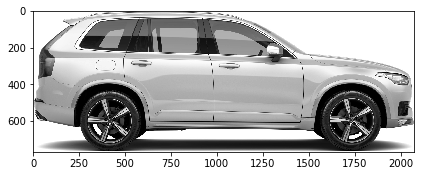

In [167]:
imshow(crop_image(image))

In [168]:
cropped_images = []
for i in range(len(photos)):
    image = crop_image(imread(photos[i], as_grey=True))
    cropped_images.append(image)

In [169]:
cropped_shapes = list(zip(*[image.shape for image in cropped_images]))

In [170]:
max(cropped_shapes[0]), max(cropped_shapes[1])

(1125, 2074)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


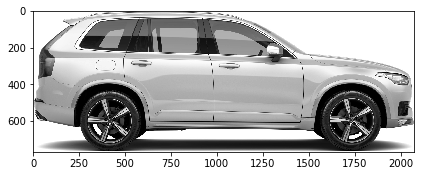

In [171]:
imshow(cropped_images[np.where(np.asarray(cropped_shapes[1]) >= 2074)[0][0]])


In [180]:
from scipy import ndimage as ndi
max(cropped_shapes[1])


2074

[202 203 204 205 206 212 213 214 215 216]


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


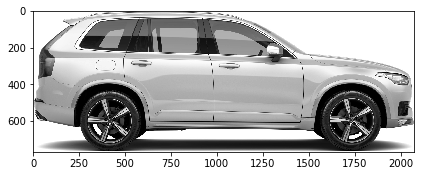

In [173]:
print(np.where(np.asarray(cropped_shapes[0]) >=max(cropped_shapes[0]))[0])
imshow(cropped_images[np.where(np.asarray(cropped_shapes[1]) ==2074)[0][0]])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


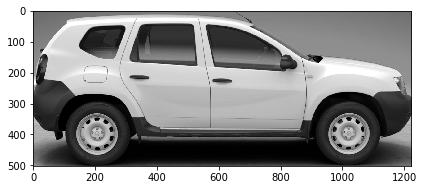

In [241]:
def crop_image_frangi(image):
    fr = filters.frangi(image)
    return crop_image(fr, image, cutoff=None)

imshow(crop_image_frangi(cropped_images[202]))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


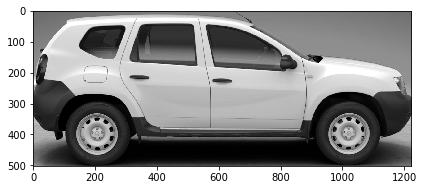

In [178]:
imshow(crop_image(fr, cropped_images[202], cutoff=None))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


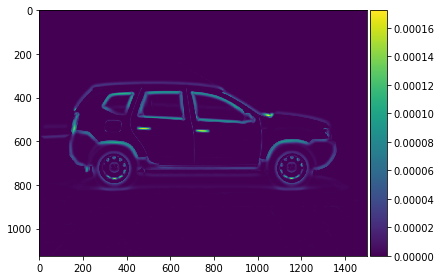

In [184]:
imshow(fr)

In [189]:
from skimage.feature import canny
edges = canny(cropped_images[202])
fill_coins = ndi.binary_fill_holes(edges)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


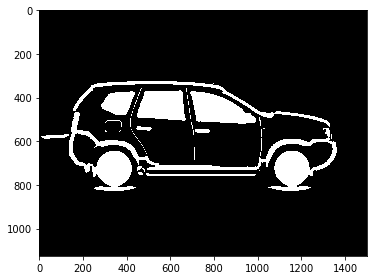

In [238]:
imshow(ndi.binary_fill_holes(fr>0.000006))
#imshow(fr)

In [194]:
elevation_map = filters.sobel(cropped_images[202])

In [195]:
from skimage.morphology import watershed

In [223]:
markers = np.zeros_like(cropped_images[202])
markers[cropped_images[202] < 0.65] = 1
markers[cropped_images[202] > 0.75] = 2


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


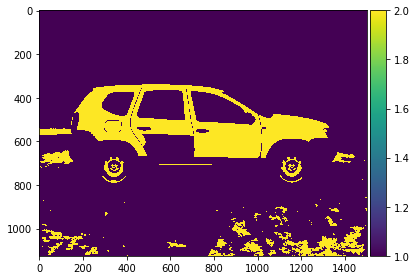

In [225]:
imshow(watershed(elevation_map+fr*50, markers))

In [226]:
cropped_images[202].max()

1.0

In [273]:
cropped_images[74] = cropped_images[74][:,100:-90]
#imshow(ndi.binary_fill_holes(fr>0.000006))

In [288]:
cropped_images[75] = cropped_images[75][:, 100:-110][20:-30]

In [290]:
cropped_images[76] = cropped_images[76][:, 100:-110][20:-30]

In [301]:

cropped_images[79] = cropped_images[79][:, 110:-110][0:-70]

In [312]:
cropped_images[80] = cropped_images[80][:, 110:-110][:-70]

In [324]:
cropped_images[88] = cropped_images[88][:-40]
cropped_images[89] = cropped_images[89][:-40]
cropped_images[90] = cropped_images[90][:,40:-10][:-40]
cropped_images[91] = cropped_images[91][:,40:-10][:-40]
cropped_images[92] = cropped_images[92][:,40:-10][:-40]

In [344]:
cropped_images[93] = cropped_images[93][:,320:-320][270:-330]
cropped_images[94] = cropped_images[94][:,320:-320][270:-330]

In [369]:
cropped_images[95] = cropped_images[95][:,200:-130][160:-160]
cropped_images[96] = cropped_images[96][:,330:-330][340:-320]

In [423]:
for i in (97, 98, 100, 111, 112, 113, 115, 117, 120):
    cropped_images[i] = cropped_images[i][:, 210:-210][240:-240]


In [436]:
cropped_images[99] = cropped_images[99][:, 180:-170][180:-170]

In [505]:
cropped_images[101] = cropped_images[101][:, 330:-330][330:-330]
cropped_images[102] = cropped_images[102][:, 240:-250][250:-250]
cropped_images[103] = cropped_images[103][:, 330:-330][330:-330]
cropped_images[104] = cropped_images[104][:, 330:-300][330:-330]
cropped_images[105] = cropped_images[105][:, 240:-250][250:-250]
cropped_images[106] = cropped_images[106][:, 240:-250][250:-250]
cropped_images[107] = cropped_images[107][:, 150:-160][170:-170]
cropped_images[108] = cropped_images[108][:, 220:-230][250:-230]
cropped_images[109] = cropped_images[109][:, 150:-150][170:-170]

In [541]:
for i in (114, 116, 118, 119, 121, 122, 123, 126):
    cropped_images[i] = cropped_images[i][:, 300:-300][320:-340]


In [589]:
cropped_images[124] = cropped_images[124][:, 220:-210][250:-250]
cropped_images[125] = cropped_images[125][:, 150:-150][160:-180]
cropped_images[127] = cropped_images[127][:, 280:-280][320:-330]
cropped_images[128] = cropped_images[128][:, 300:-290][320:-330]
cropped_images[129] = cropped_images[129][:, 220:-220][250:-250]

In [698]:
cropped_images[130] = cropped_images[130][:, 180:-170][170:-170]
for i in (131, 132):
    cropped_images[i] = cropped_images[i][:, 340:-300][300:-320]
for i in (133, 135, 137, 138, 140, 141, 143, 144):
    cropped_images[i] = cropped_images[i][:, 410:-370][320:-340]
for i in (134, 136, 139, 142, 146):
    cropped_images[i] = cropped_images[i][:, 220:-200][180:-180]

In [730]:
for i in (145, 147, 148, 149, 151):
    cropped_images[i] = cropped_images[i][:, 340:-320][300:-290]
#for i in(148):
#    cropped_images[i] = cropped_images[i][:, 410:-360][320:-310]

In [736]:
cropped_images[150] = cropped_images[150][:, 340:-330][320:-310]

In [745]:
for i in (148, 149):
    cropped_images[i] = cropped_images[i][:, 90:-50][20:-20]

In [771]:
cropped_images[151] = cropped_images[151][:, 90:-50][20:-20]
cropped_images[152] = cropped_images[152][:, 330:-340][320:-300]
cropped_images[153] = cropped_images[153][:, 410:-340][320:-300]
cropped_images[154] = cropped_images[154][:, 410:-340][320:-300]
cropped_images[155] = cropped_images[155][:, 350:-340][320:-300]

In [776]:
cropped_images[156] = cropped_images[156][:, 350:-340][310:-310]
cropped_images[157] = cropped_images[157][:, 350:-340][310:-310]

In [777]:
import ipywidgets as widgets
from ipywidgets import interact

def get_image(i):
    imshow(cropped_images[i])
    plt.show()
interact(get_image, i=(0, len(cropped_images)-1), value=93)

interactive(children=(IntSlider(value=136, description='i', max=273), Output()), _dom_classes=('widget-interact',))

<function __main__.get_image>

In [781]:
for i in range(157, len(cropped_images)):
    cropped_images[i] = crop_image_frangi(cropped_images[i])

In [782]:
#plt.clear('all')
import pickle
with open("cropped_images_temp.pkl", 'wb') as f:
    pickle.dump(cropped_images, f)

In [801]:
for i in (159, 160, 161, 162):
    cropped_images[i] = cropped_images[i][:, 250:-240][130:]

In [813]:
cropped_images[163] = cropped_images[163][:, 0:-120][90:]

In [827]:
for i in (164, 165, 166):
    cropped_images[i] = cropped_images[i][:, 250:-250][190:]

In [838]:
for i in (167, 168, 169):
    cropped_images[i] = cropped_images[i][:, :-90][:]

In [866]:
cropped_images[170] = cropped_images[170][:, :-130][100:]
for i in (171, 172):
    cropped_images[i] = cropped_images[i][:, 250:-250][200:]
    
cropped_images[173] = cropped_images[173][:, :-100][:]

In [881]:
cropped_images[185] = cropped_images[185][:, 100:][:]
cropped_images[186] = cropped_images[186][:, 80:-20][:]
cropped_images[187] = cropped_images[187][:, 80:-60][:]
cropped_images[188] = cropped_images[188][:, 80:-60][:]
cropped_images[189] = cropped_images[189][:, 80:-60][:]


In [885]:
cropped_images[190] = cropped_images[190][:, 80:-60][:]

In [891]:
for i in (196, 197):
    cropped_images[i] = cropped_images[i][:, 50:][:]

In [896]:
cropped_images[199] = cropped_images[199][:, 50:][:]
cropped_images[200] = cropped_images[200][:, 50:][:]
cropped_images[205] = cropped_images[205][:, :-50][:]

In [905]:
cropped_images[206] = cropped_images[206][:, :-50][:]
cropped_images[234] = cropped_images[234][:, :-50][:]

In [917]:
for i in (235, 236, 237, 238, 239, 240):
    cropped_images[i] = cropped_images[i][:, :][:-30]

In [922]:
for i in (242, 243, 244):
    cropped_images[i] = cropped_images[i][:, :][:-30]

In [930]:
for i in (246, 247, 248, 249):
    cropped_images[i] = cropped_images[i][:, 50:][:]
cropped_images[250] = cropped_images[250][:, 50:-20][:]

In [936]:
for i in (251, 252, 253, 254):
    cropped_images[i] = cropped_images[i][:, :-20][:]

In [946]:
for i in (255, 256, 257, 258, 259):
    cropped_images[i] = cropped_images[i][:, 50:-50][:]

In [953]:
for i in (260, 261, 262):
    cropped_images[i] = cropped_images[i][:, 50:-20][:]
for i in (263, 264):   
    cropped_images[i] = cropped_images[i][:, 50:-40][:]

In [954]:
def get_image2(i):
    imshow(cropped_images[i])
    plt.show()

interact(get_image2, i=(265, len(cropped_images)-1))

interactive(children=(IntSlider(value=269, description='i', max=273, min=265), Output()), _dom_classes=('widget-interact',))

<function __main__.get_image2>

In [785]:
#plt.clean('all')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


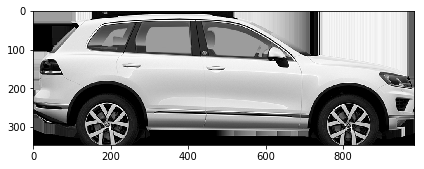

In [952]:
#for i in (159, 160, 161, 162):
imshow(cropped_images[264][:, 50:-40][:])

In [955]:
with open("cropped_all.pkl", 'wb') as f:
    pickle.dump(cropped_images, f)

In [958]:
cropped_shapes = list(zip(*[image.shape for image in cropped_images]))

In [960]:
max(cropped_shapes[0]), max(cropped_shapes[1])

(1080, 2035)

In [961]:
min(cropped_shapes[0]), min(cropped_shapes[1])

(172, 470)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


(424, 1216) (106, 304)


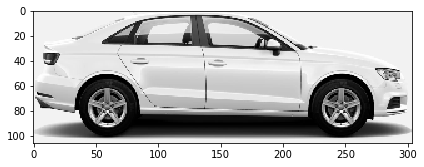

In [963]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

for image in cropped_images:
    image_rescaled = rescale(image, 1.0 / 4.0)
    imshow(image_rescaled)
    print(image.shape, image_rescaled.shape)
    break